In [2]:
import numpy as np
import pandas as pd
import tushare as ts
import matplotlib.pyplot as plt

In [23]:
df = ts.get_k_data("600519",start="1988-01-01")

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [24]:
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

In [25]:
df

,open,close,high,low,volume,code
date,,,,,,
2001-08-27,5.392,5.554,5.902,5.132,406318.00,600519
2001-08-28,5.467,5.759,5.781,5.407,129647.79,600519
2001-08-29,5.777,5.684,5.781,5.640,53252.75,600519
2001-08-30,5.668,5.796,5.860,5.624,48013.06,600519
2001-08-31,5.804,5.782,5.877,5.749,23231.48,600519
...,...,...,...,...,...,...
2021-09-24,1628.000,1694.000,1719.980,1628.000,69537.00,600519
2021-09-27,1750.000,1855.000,1863.400,1750.000,126869.00,600519
2021-09-28,1848.000,1822.060,1860.000,1795.000,49221.00,600519


##计算历史股票数据的5日均线和30日均线

In [26]:
df["ma5"]= np.nan
df["ma30"]= np.nan

for i in range(4, len(df)):
    df.loc[df.index[i],"ma5"] = df['close'][i-4:i+1].mean()
 
for i in range(29, len(df)):
    df.loc[df.index[i],"ma30"] = df['close'][i-29:i+1].mean()

In [27]:
df["ma5"] = df["close"].rolling(5).mean()
df["ma30"] = df["close"].rolling(30).mean()

In [28]:
df["ma5"]

date
2001-08-27         NaN
2001-08-28         NaN
2001-08-29         NaN
2001-08-30         NaN
2001-08-31       5.715
                ...   
2021-09-24    1658.152
2021-09-27    1701.538
2021-09-28    1728.750
2021-09-29    1765.212
2021-09-30    1804.212
Name: ma5, Length: 4803, dtype: float64

In [29]:
df

,open,close,high,low,volume,code,ma5,ma30
date,,,,,,,,
2001-08-27,5.392,5.554,5.902,5.132,406318.00,600519,NaN,NaN
2001-08-28,5.467,5.759,5.781,5.407,129647.79,600519,NaN,NaN
2001-08-29,5.777,5.684,5.781,5.640,53252.75,600519,NaN,NaN
2001-08-30,5.668,5.796,5.860,5.624,48013.06,600519,NaN,NaN
2001-08-31,5.804,5.782,5.877,5.749,23231.48,600519,5.715,NaN
...,...,...,...,...,...,...,...,...
2021-09-24,1628.000,1694.000,1719.980,1628.000,69537.00,600519,1658.152,1636.453000
2021-09-27,1750.000,1855.000,1863.400,1750.000,126869.00,600519,1701.538,1641.953000
2021-09-28,1848.000,1822.060,1860.000,1795.000,49221.00,600519,1728.750,1646.020333


##可视化历史股票的收盘价和两条均线

<AxesSubplot:xlabel='date'>

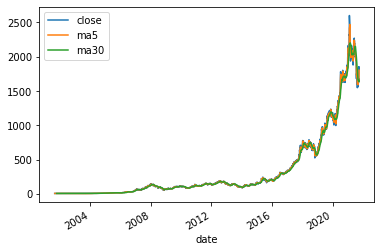

In [30]:
df[['close','ma5','ma30']].plot()

##数据所有金叉日期和死叉日期

In [31]:
df = df.dropna()

In [41]:
df = df["2010-01-01":]

In [42]:
golden_cross = []
death_cross = []

for i in range(1,len(df)):
    if df["ma5"][i] >= df["ma30"][i] and df["ma5"][i-1] <= df["ma30"][i-1]:
        golden_cross.append(df.index[i])
    if df["ma5"][i] <= df["ma30"][i] and df["ma5"][i-1] >= df["ma30"][i-1]:
        death_cross.append(df.index[i])

        
golden_cross       

[Timestamp('2010-01-20 00:00:00'),
 Timestamp('2010-02-03 00:00:00'),
 Timestamp('2010-06-04 00:00:00'),
 Timestamp('2010-07-19 00:00:00'),
 Timestamp('2010-10-22 00:00:00'),
 Timestamp('2010-11-10 00:00:00'),
 Timestamp('2011-02-11 00:00:00'),
 Timestamp('2011-03-14 00:00:00'),
 Timestamp('2011-04-28 00:00:00'),
 Timestamp('2011-10-25 00:00:00'),
 Timestamp('2012-02-10 00:00:00'),
 Timestamp('2012-07-25 00:00:00'),
 Timestamp('2012-08-09 00:00:00'),
 Timestamp('2012-09-12 00:00:00'),
 Timestamp('2012-09-27 00:00:00'),
 Timestamp('2012-12-21 00:00:00'),
 Timestamp('2013-01-10 00:00:00'),
 Timestamp('2013-03-12 00:00:00'),
 Timestamp('2013-04-17 00:00:00'),
 Timestamp('2013-07-03 00:00:00'),
 Timestamp('2013-10-22 00:00:00'),
 Timestamp('2013-11-11 00:00:00'),
 Timestamp('2013-11-28 00:00:00'),
 Timestamp('2014-01-23 00:00:00'),
 Timestamp('2014-04-03 00:00:00'),
 Timestamp('2014-06-23 00:00:00'),
 Timestamp('2014-09-04 00:00:00'),
 Timestamp('2014-09-29 00:00:00'),
 Timestamp('2014-11-

In [43]:
sr1 = df["ma5"] < df["ma30"]
sr2 = df["ma5"] >= df["ma30"]

golden_cross = df[ - (sr1 | sr2.shift(1))].index
death_cross = df[sr1 & sr2.shift(1)].index

golden_cross

DatetimeIndex(['2010-01-20', '2010-02-03', '2010-06-04', '2010-07-19',
               '2010-10-22', '2010-11-10', '2011-02-11', '2011-03-14',
               '2011-04-28', '2011-10-25', '2012-02-10', '2012-07-25',
               '2012-08-09', '2012-09-12', '2012-09-27', '2012-12-21',
               '2013-01-10', '2013-03-12', '2013-04-17', '2013-07-03',
               '2013-10-22', '2013-11-11', '2013-11-28', '2014-01-23',
               '2014-04-03', '2014-06-23', '2014-09-04', '2014-09-29',
               '2014-11-20', '2014-11-28', '2015-02-13', '2015-07-15',
               '2015-09-16', '2015-10-09', '2015-12-03', '2015-12-21',
               '2016-02-22', '2016-08-11', '2016-10-13', '2016-11-25',
               '2017-07-24', '2017-09-18', '2017-12-15', '2018-03-16',
               '2018-05-09', '2018-07-18', '2018-07-25', '2018-09-20',
               '2018-12-04', '2019-01-03', '2019-06-14', '2019-08-13',
               '2020-01-02', '2020-02-19', '2020-03-03', '2020-04-02',
      

##投入金钱10000，根据金叉，尽量买入/死叉，全部卖出，进行投资。截止今天，我们的收益如何？

In [48]:
first_money = 10000
money = first_money
hold = 0

sr1 = pd.Series(1,index=golden_cross)
sr2 = pd.Series(0,index=death_cross)
sr = sr1.append(sr2).sort_index()

for i in range(0,len(sr)):
    p = df["open"][sr.index[i]]
    if sr.iloc[i] ==1:
        #金叉
        buy = (money // (100 *p))
        hold += buy*100
        money -= buy*100*p
    else:
        money += hold*p
        hold = 0
        
p = df["open"][-1]
now_money = hold * p + money

print(now_money-first_money)

90717.29999999999
